<a href="https://colab.research.google.com/github/feerose111/ML-and-Data-Analysis-Projects/blob/main/Building_Linear_Regression_Model_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression Model with Python

Linear Regression
**Y = wX + b**

Y--> dependent variable

X-->independent variable

w-->weight

b--> bias

.



**Gradient Descent**

w = w - ɑ*dw

b= b - ɑ*db

dw , db -->learning rate

In [95]:
#importing the dependency
import numpy as np

In [96]:
class Linear_Regression():

    def __init__(self, learning_rate, no_of_iterations):

      self.learning_rate  =learning_rate
      self.no_of_iterations = no_of_iterations

    def fit(self, X, Y):

      #number of training variables and number of features
      self.m, self.n = X.shape

      #initiating number of weights and bias
      self.w = np.zeros(self.n)
      self.b = 0
      self.X = X
      self.Y = Y

      #implementing Gradiant Descent

      for i in range( self.no_of_iterations ):
        self.update_weights()

    def update_weights(self):
      Y_prediction = self.predict(self.X)

      #calculate gradients
      dw = - (2*(self.X.T).dot(self.Y - Y_prediction) )/ self.m
      db = - 2 * np.sum(self.Y - Y_prediction) / self.m

      #updating the weights and bias
      self.w = self.w - self.learning_rate * dw
      self.b = self.b - self.learning_rate * db


    def predict(self, X ):

      return X.dot(self.w) + self.b # Y = wX + b


Importing the dependencies

In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



Data Preprocessing

In [98]:
#loading the csv file to pandas dataframe
salary_data = pd.read_csv('/content/salary_data.csv')

In [99]:
#printing the first 5 rows of the dataframe
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [100]:
#last 5 rows
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [101]:
#number of rows and columns
salary_data.shape

(30, 2)

In [102]:
#checking for missing values
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Separating the features and target

In [103]:
X = salary_data.iloc[:,:-1].values #.drop(['Salary'], axis=1)
Y = salary_data.iloc[:,1].values #['YearsExperience']

In [104]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [105]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


Splitting the data into training and test data

In [106]:
X_train, X_test, Y_train, Y_test = train_test_split(X , Y, test_size=0.2, random_state=2)

In [137]:
#training the linear regression model
model = Linear_Regression(learning_rate =0.01, no_of_iterations=1000)

In [138]:
model.fit(X_train, Y_train)

In [139]:
#printing the parameter values(weight & bias)
print(" Weight = ", model.w[0])
print(" Bias = ", model.b)

 Weight =  9634.78529190999
 Bias =  23935.49212114018


Predict the salary value for test data

In [140]:
test_data_prediction = model.predict(X_test)


In [141]:
print(test_data_prediction)

[36460.71300062 34533.75594224 67292.02593474 59584.19770121
 92342.4676937  81744.2038726 ]


Visualizing the predicted value and actual value

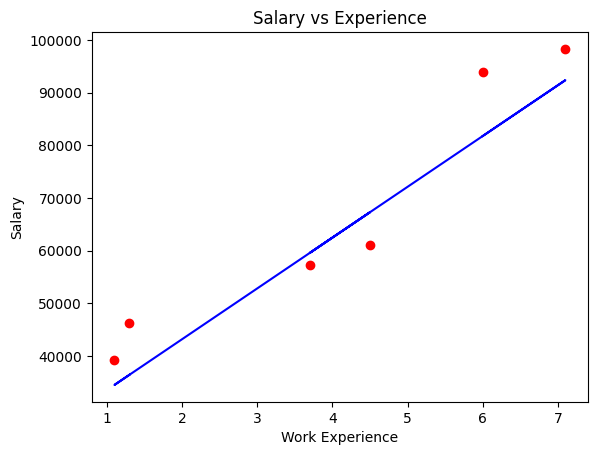

In [142]:
plt.scatter(X_test, Y_test , color ='red')
plt.plot(X_test, test_data_prediction, color='blue')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()